# Lab 3
### Mohsen Ahmadkhani

In [35]:
#create a raster that assigns the max value in the neighborhood to each pixel. In this way all no data values will be filled. 
from arcpy.sa import *
clipped_dem = r'supplementary/dem_clipped.tif'
outFocalStatdem = FocalStatistics(clipped_dem,  NbrRectangle(3,3,'CELL'), 'MAJORITY', "NODATA")
outFocalStatdem.save("supplementary/dem_clipped_MAJORITY.tif")


In [36]:
# replace the pixels with the value -9999 with the calculated majority raster
from arcpy import env
env.workspace = "supplementary"
cleaned = Con('dem_clipped.tif', 'dem_clipped_MAJORITY.tif', 'dem_clipped.tif', "VALUE < -9998")
cleaned.save("dem_clipped_final.tif")


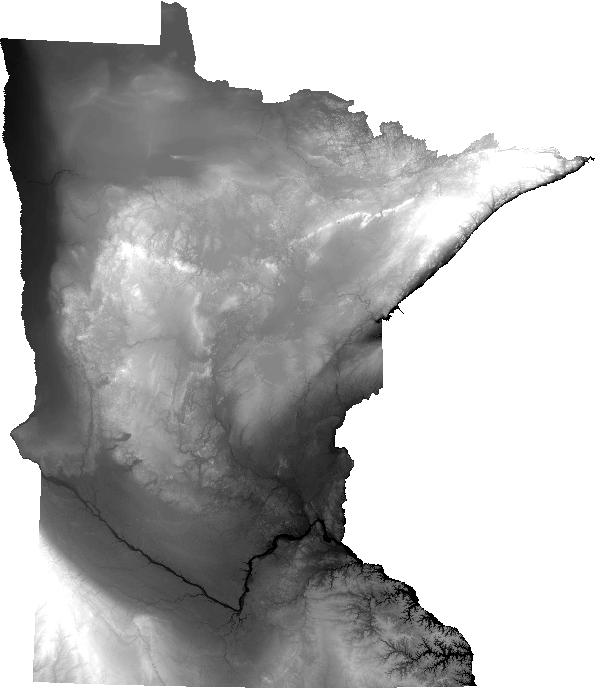

In [37]:
arcpy.Raster('dem_clipped_final.tif')

In [34]:
# clip the downloaded landcover with the state boundary shapefile replacing no data pixels with 0
import arcpy
arcpy.env.overwriteOutput = True
dem = r'supplementary/elev_30m_digital_elevation_model.gdb/digital_elevation_model_30m'
arcpy.Clip_management(dem, "189775.332039 4816305.370038 761665.332039 5472435.370038", 
                      r'supplementary/dem_clipped.tif', r"supplementary/mn_boundary.shp", "-9999", "ClippingGeometry")


<Result 'supplementary\\dem_clipped.tif'>

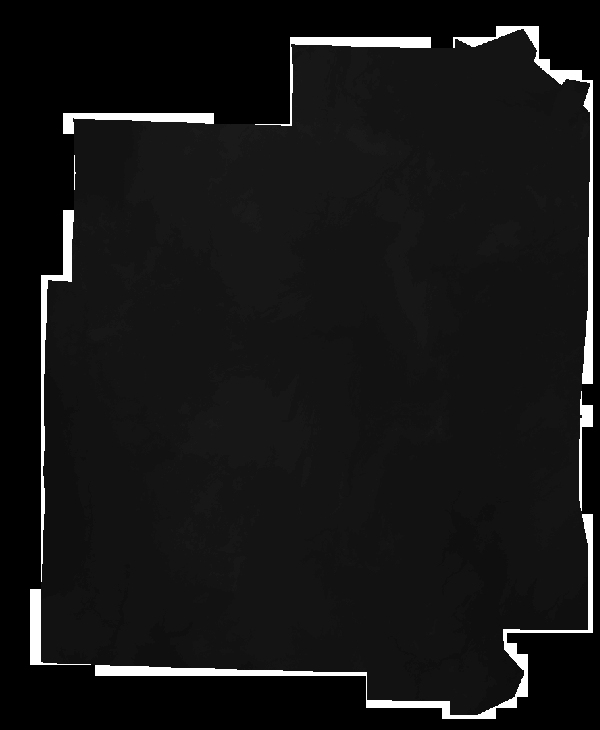

In [2]:
import arcpy
lc = 'demraster.tif'

my_raster = arcpy.Raster(lc)
# my_min = my_raster.minimum
# my_max = my_raster.maximum
# my_area = (my_raster.width * my_raster.height) * my_raster.meanCellWidth

my_raster



In [6]:
path = r'C:\Users\umn-ahmad178\Desktop\lab3'
arcpy.env.workspace = path



region = 'region_counties.shp'
out_name = 'rand_points.shp'
# arcpy.conversion.RasterToPoint(lc, out_point_all)
arcpy.management.CreateRandomPoints(path, out_name, {constraining_feature_class}, {constraining_extent}, {number_of_points_or_field}, {minimum_allowed_distance}, {create_multipoint_output}, {multipoint_size})


In [2]:
# SummarizeCategoricalRaster(in_raster, out_table, {dimension}, {aoi}, {aoi_id_field})

import arcpy
path = r'C:\Users\umn-ahmad178\Desktop\lab3'
arcpy.env.workspace = path
my_raster = 'demraster.tif'
r = 0
my_dict = [row[1] for row in arcpy.da.SearchCursor(my_raster,['Value','Count'])]
my_dict



[1.0,
 1.0,
 5.0,
 3.0,
 4.0,
 3.0,
 1.0,
 15.0,
 25.0,
 65.0,
 20.0,
 19.0,
 9.0,
 9.0,
 9.0,
 14.0,
 17.0,
 18.0,
 46.0,
 89.0,
 25.0,
 24.0,
 25.0,
 25.0,
 20.0,
 30.0,
 23.0,
 38.0,
 57.0,
 140.0,
 41.0,
 51.0,
 79.0,
 36.0,
 45.0,
 34.0,
 41.0,
 51.0,
 67.0,
 101.0,
 63.0,
 93.0,
 110.0,
 55.0,
 68.0,
 90.0,
 87.0,
 109.0,
 139.0,
 171.0,
 116.0,
 119.0,
 102.0,
 104.0,
 108.0,
 113.0,
 130.0,
 156.0,
 171.0,
 260.0,
 220.0,
 252.0,
 217.0,
 190.0,
 373.0,
 245.0,
 289.0,
 367.0,
 488.0,
 790.0,
 411.0,
 342.0,
 313.0,
 265.0,
 402.0,
 485.0,
 467.0,
 577.0,
 739.0,
 2936.0,
 964.0,
 686.0,
 642.0,
 2166.0,
 1470.0,
 1145.0,
 1146.0,
 986.0,
 1290.0,
 2931.0,
 1411.0,
 1080.0,
 1039.0,
 1572.0,
 1591.0,
 1107.0,
 1539.0,
 1146.0,
 1491.0,
 3781.0,
 1449.0,
 1211.0,
 1774.0,
 1141.0,
 1514.0,
 1071.0,
 1708.0,
 1130.0,
 1616.0,
 5250.0,
 2007.0,
 1575.0,
 2623.0,
 1819.0,
 2823.0,
 1936.0,
 2963.0,
 2078.0,
 2989.0,
 7783.0,
 2566.0,
 1962.0,
 2725.0,
 1900.0,
 2867.0,
 2887.0,
 17

In [4]:
P_COUNT = 0
for row in arcpy.da.SearchCursor(my_raster,['Value','Count']):
    P_COUNT += row[1]
    
P_COUNT

4896519.0

In [5]:
five_percent = int(P_COUNT*5/100)

five_percent

244825

In [6]:
region = 'region_dissolve.shp'
out_name = 'rand_points3.shp'
arcpy.management.CreateRandomPoints(path, out_name, region, region, five_percent)


<Result 'C:\\Users\\umn-ahmad178\\Desktop\\lab3\\rand_points3.shp'>

In [8]:
from arcpy.ia import *

Sample('demraster.tif', 'rand_points3.shp',
       "sampled_values.shp","NEAREST", unique_id_field = "FID", generate_feature_class = True)

<geoprocessing server result object at 0x19944a43170>

In [9]:
import arcpy
from arcpy.sa import *

ExtractValuesToPoints('rand_points3.shp', 'demraster.tif', "sampled_values.shp")

<geoprocessing server result object at 0x19944a43300>

In [11]:

from arcpy.sa import *

outKrig = Kriging("sampled_values.shp", "RASTERVALU", KrigingModelOrdinary("CIRCULAR", 2000, 2.6, 542, 0), cell_size = 'demraster.tif')
outKrig.save("krigout")
outRescale = RescaleByFunction("krigout", TfLinear(-2933.24, 45144.63, 920, "#", 1856, "NoData"), 920, 1856)
outRescale.save("krigout_rescaled")

In [12]:
outidw = Idw("sampled_values.shp", "RASTERVALU", "demraster.tif", 2, RadiusVariable(12))
outidw.save("idw")

In [13]:
nn = NaturalNeighbor("sampled_values.shp", "RASTERVALU", "demraster.tif")
nn.save("nn")

In [14]:
#15 classes
rec = Reclassify("demraster.tif", 'Value', RemapValue([[920,983],[983,1044],[1044,1107],[1107,1170],[1170,1232],[1232,1294],[1294,1356]]))
rec.save('dem_15classes')
rec = Reclassify("idw.tif", 'Value', RemapValue([[920,983],[983,1044],[1044,1107],[1107,1170],[1170,1232],[1232,1294],[1294,1356]]))
rec.save('idw_15classes')
rec = Reclassify("nn.tif", 'Value', RemapValue([[920,983],[983,1044],[1044,1107],[1107,1170],[1170,1232],[1232,1294],[1294,1356]]))
rec.save('nn_15classes')
rec = Reclassify("krigout_rescaled.tif", 'Value', RemapValue([[920,983],[983,1044],[1044,1107],[1107,1170],[1170,1232],[1232,1294],[1294,1356]]))
rec.save('krig_15classes')

In [15]:
#Create accuracy assessment points for IDW
CreateAccuracyAssessmentPoints("demraster.tif", "aapoints.shp", 
                               "GROUND_TRUTH", "1000", "RANDOM")


In [16]:
UpdateAccuracyAssessmentPoints("idw.tif", "aapoints.shp", "updated_aapoints.shp", "CLASSIFIED")

In [17]:
ComputeConfusionMatrix("updated_aapoints.shp", "cmatrix_idw.dbf")

In [ ]:
CREATE TABLE IF NOT EXISTS public.cmatrix_idw
(
    OID integer NOT NULL,
    ClassValue character varying(25),
    C_2 double precision,
    C_3 double precision,
    C_4 double precision,
    C_5 double precision,
    C_6 double precision,
    C_7 double precision,
    C_8 double precision,
    C_9 double precision,
    C_10 double precision,
    C_11 double precision,
    C_12 double precision,
    C_13 double precision,
    C_15 double precision,
    Total double precision,
    U_Accuracy double precision,
    Kappa double precision,
    CONSTRAINT cmatrix_idw_pkey PRIMARY KEY (OID)
)

CREATE TABLE IF NOT EXISTS public.cmatrix_idw
(
    OID integer NOT NULL,
    ClassValue character varying(25),
    C_2 double precision,
    C_3 double precision,
    C_4 double precision,
    C_5 double precision,
    C_6 double precision,
    C_7 double precision,
    C_8 double precision,
    C_9 double precision,
    C_10 double precision,
    C_11 double precision,
    C_12 double precision,
    C_13 double precision,
    C_15 double precision,
    Total double precision,
    U_Accuracy double precision,
    Kappa double precision,
    CONSTRAINT cmatrix_idw_pkey PRIMARY KEY (OID)
)

CREATE TABLE IF NOT EXISTS public.cmatrix_krig
(
    OID integer NOT NULL,
    ClassValue character varying(25),
    C_2 double precision,
    C_3 double precision,
    C_4 double precision,
    C_5 double precision,
    C_6 double precision,
    C_7 double precision,
    C_8 double precision,
    C_9 double precision,
    C_10 double precision,
    C_11 double precision,
    C_12 double precision,
    C_13 double precision,
    C_15 double precision,
    Total double precision,
    U_Accuracy double precision,
    Kappa double precision,
    CONSTRAINT cmatrix_krig_pkey PRIMARY KEY (OID)
)


In [45]:
import json
import psycopg2

connection = psycopg2.connect("host=localhost dbname=postgres user=postgres password=13651366")
connection.autocommit = True
cursor = connection.cursor()

data = []
with open('cmatrix_krig.json') as f:
    for line in f:
        data.append(json.loads(line))

fields = [
    'OID',
    'ClassValue',
    "C_2",
    "C_3",
    "C_4",
    "C_5",
    "C_6",
    "C_7",
    "C_8",
    "C_9",
    "C_10",
    "C_11",
    "C_12",
    "C_13",
    "C_15",
    "Total",
    "U_Accuracy",
    "Kappa"
]

for i in range(len(data[0]['features'])):
    insert_query = "INSERT INTO cmatrix_krig VALUES (%s, %s, %s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s, %s, %s)"
    my_data = list(data[0]['features'][i]['attributes'].values())
    cursor.execute(insert_query, my_data) 
    

In [46]:
import json
import psycopg2

connection = psycopg2.connect("host=localhost dbname=postgres user=postgres password=13651366")
connection.autocommit = True
cursor = connection.cursor()

data = []
with open('cmatrix_nn.json') as f:
    for line in f:
        data.append(json.loads(line))

fields = [
    'OID',
    'ClassValue',
    "C_2",
    "C_3",
    "C_4",
    "C_5",
    "C_6",
    "C_7",
    "C_8",
    "C_9",
    "C_10",
    "C_11",
    "C_12",
    "C_13",
    "C_15",
    "Total",
    "U_Accuracy",
    "Kappa"
]

for i in range(len(data[0]['features'])):
    insert_query = "INSERT INTO cmatrix_nn VALUES (%s, %s, %s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s, %s, %s)"
    my_data = list(data[0]['features'][i]['attributes'].values())
    cursor.execute(insert_query, my_data) 
    


In [2]:
import json
import psycopg2

connection = psycopg2.connect("host=localhost dbname=postgres user=postgres password=13651366")
connection.autocommit = True
cursor = connection.cursor()

data = []
with open('cmatrix_idw.json') as f:
    for line in f:
        data.append(json.loads(line))

fields = [
    'OID',
    'ClassValue',
    "C_2",
    "C_3",
    "C_4",
    "C_5",
    "C_6",
    "C_7",
    "C_8",
    "C_9",
    "C_10",
    "C_11",
    "C_12",
    "C_13",
    "C_15",
    "Total",
    "U_Accuracy",
    "Kappa"
]

for i in range(len(data[0]['features'])):
    insert_query = "INSERT INTO cmatrix_idw VALUES (%s, %s, %s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s, %s,%s, %s, %s, %s)"
    my_data = list(data[0]['features'][i]['attributes'].values())
    cursor.execute(insert_query, my_data) 
    


{"displayFieldName":"","fieldAliases":{"OID":"OID","ClassValue":"ClassValue","C_2":"C_2","C_3":"C_3","C_4":"C_4","C_5":"C_5","C_6":"C_6","C_7":"C_7","C_8":"C_8","C_9":"C_9","C_10":"C_10","C_11":"C_11","C_12":"C_12","C_13":"C_13","C_15":"C_15","Total":"Total","U_Accuracy":"U_Accuracy","Kappa":"Kappa"},"fields":[{"name":"OID","type":"esriFieldTypeOID","alias":"OID"},{"name":"ClassValue","type":"esriFieldTypeString","alias":"ClassValue","length":254},{"name":"C_2","type":"esriFieldTypeDouble","alias":"C_2"},{"name":"C_3","type":"esriFieldTypeDouble","alias":"C_3"},{"name":"C_4","type":"esriFieldTypeDouble","alias":"C_4"},{"name":"C_5","type":"esriFieldTypeDouble","alias":"C_5"},{"name":"C_6","type":"esriFieldTypeDouble","alias":"C_6"},{"name":"C_7","type":"esriFieldTypeDouble","alias":"C_7"},{"name":"C_8","type":"esriFieldTypeDouble","alias":"C_8"},{"name":"C_9","type":"esriFieldTypeDouble","alias":"C_9"},{"name":"C_10","type":"esriFieldTypeDouble","alias":"C_10"},{"name":"C_11","type":"e

In [3]:
idw_dif_q = '''
select * 
from updated_points_idw
where classified != grndtruth
'''

In [8]:
nn_dif_q = '''
select * 
from updated_points_nn
where classified != grndtruth
'''

In [9]:
krig_dif_q = '''
select * 
from updated_points_krig
where classified != grndtruth
'''